In [4]:
! unzip -qq '/content/bike-sharing-demand.zip'

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [6]:
train = pd.read_csv('/content/train.csv', parse_dates=['datetime'])
train.shape

(10886, 12)

In [7]:
# 데이터 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [9]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


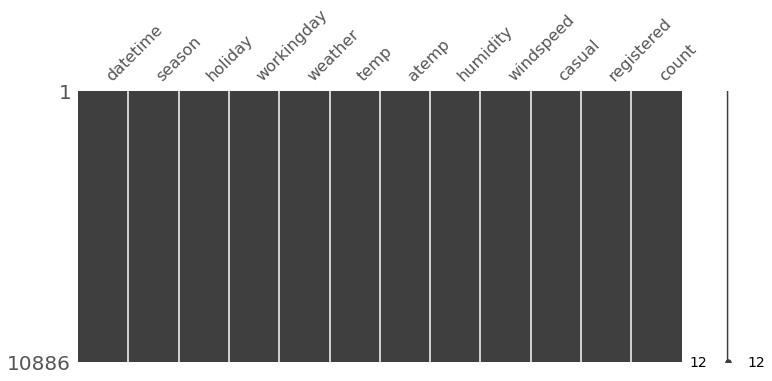

In [10]:
# 결측값 확인
import missingno as msno
msno.matrix(train, figsize=(12,5))

In [11]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

In [12]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


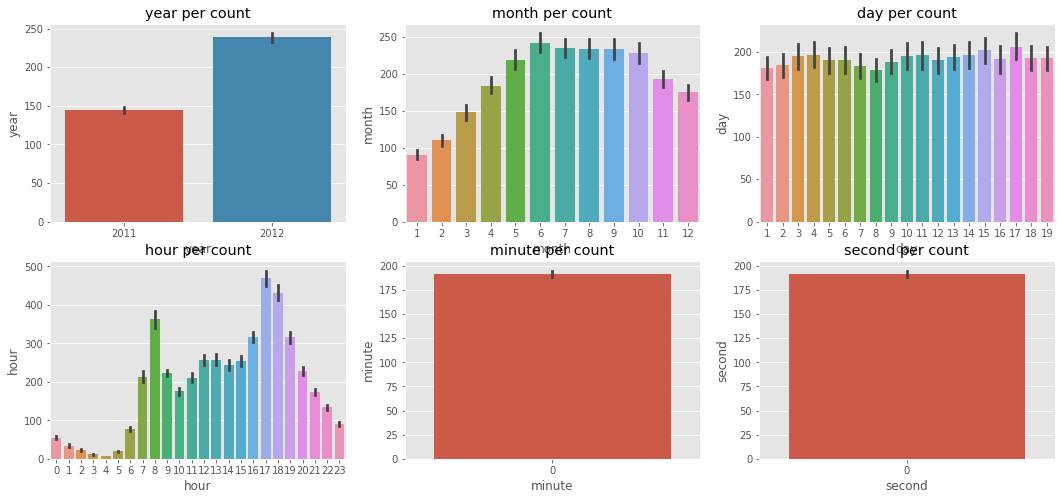

In [13]:
# 시간 변수들 타겟과 관계도 보기
fig, ax = plt.subplots(2,3)
fig.set_size_inches(18,8)

for i, k in enumerate(['year', 'month', 'day', 'hour', 'minute', 'second']):
    row = i // 3
    col = i % 3
    sns.barplot(data=train, x=k, y='count', ax=ax[row][col])
    ax[row][col].set(ylabel=k, title="{} per count".format(k))

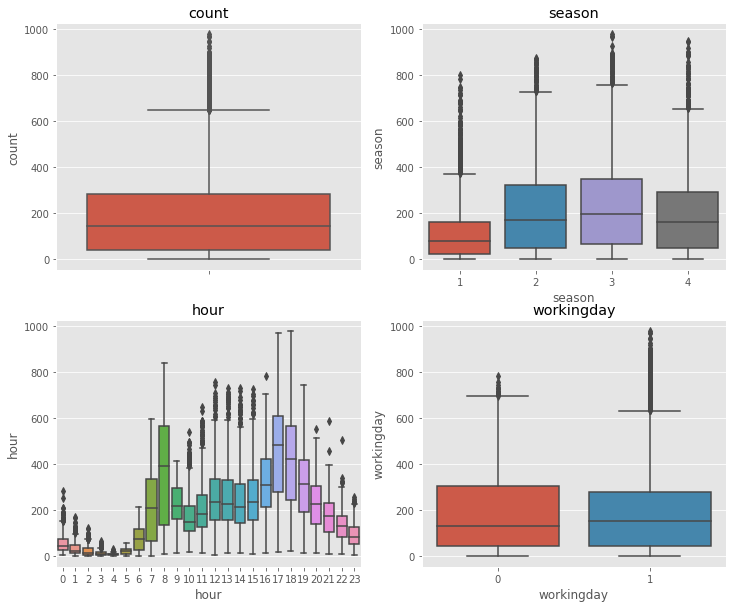

In [14]:
fig, ax = plt.subplots(2,2)
fig.set_size_inches(12,10)
sns.boxplot(data=train, y='count', orient='v', ax=ax[0][0])
sns.boxplot(data=train, y='count', x='season', ax=ax[0][1])
sns.boxplot(data=train, y='count', x='hour', ax=ax[1][0])
sns.boxplot(data=train, y='count', x='workingday', ax=ax[1][1])

ax[0][0].set(ylabel='count', title='count')
ax[0][1].set(ylabel='season', title='season')
ax[1][0].set(ylabel='hour', title='hour')
ax[1][1].set(ylabel='workingday', title='workingday')

plt.show()

In [15]:
train['dayofweek'] = train['datetime'].dt.dayofweek

In [16]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

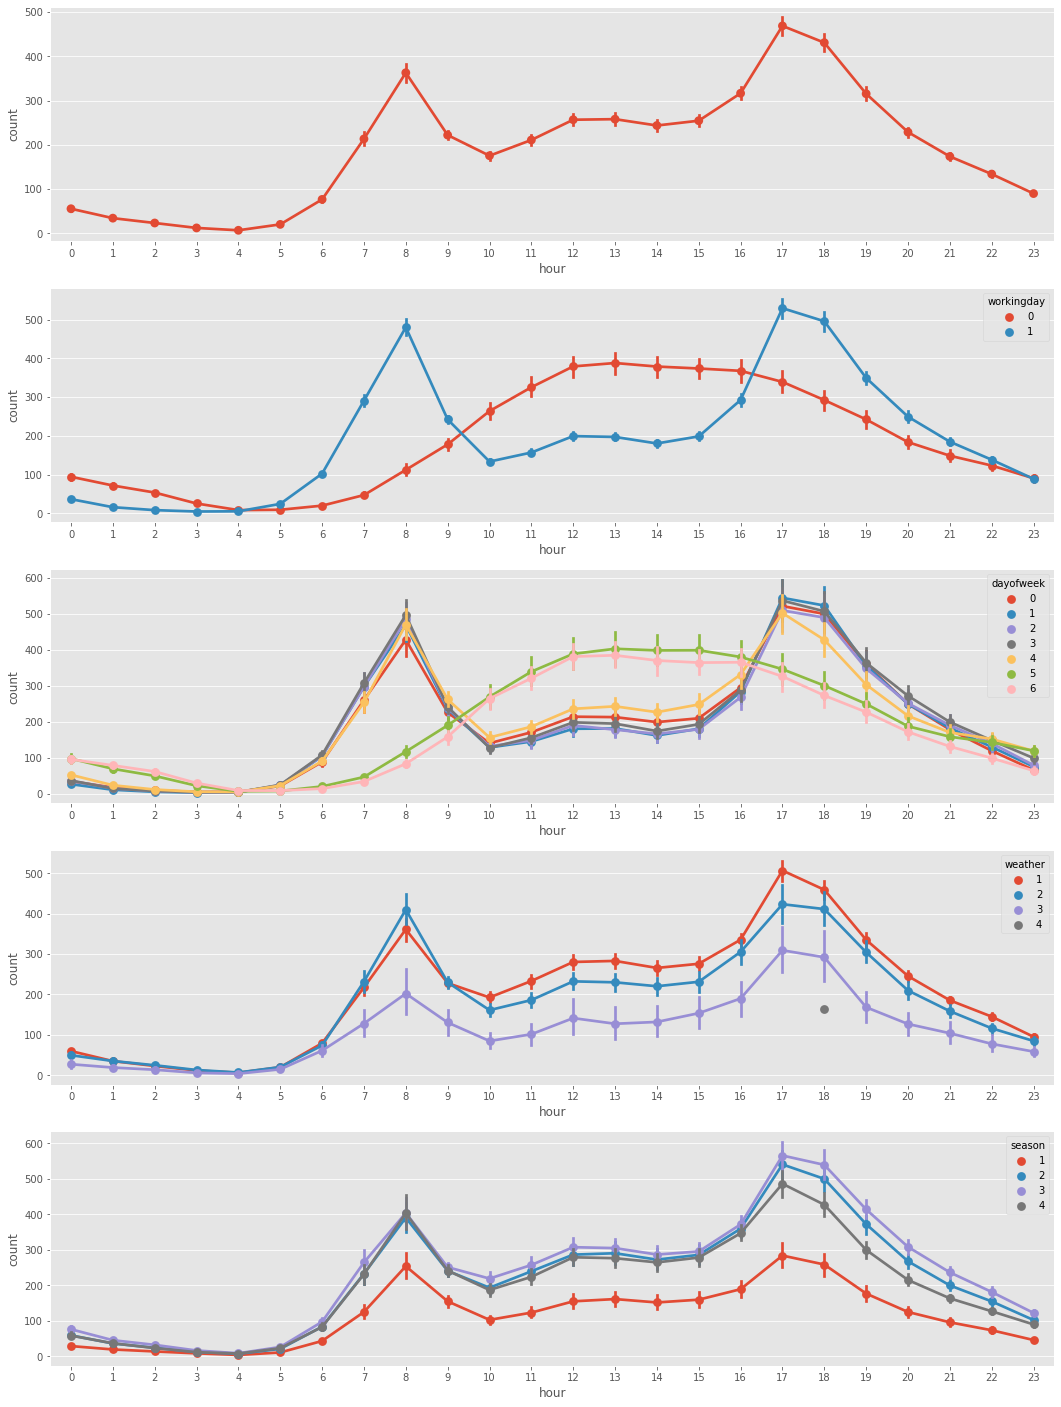

In [17]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5)
fig.set_size_inches(18,25)

sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count',hue='workingday', ax=ax2)
sns.pointplot(data=train, x='hour', y='count',hue='dayofweek', ax=ax3)
sns.pointplot(data=train, x='hour', y='count',hue='weather', ax=ax4)
sns.pointplot(data=train, x='hour', y='count',hue='season', ax=ax5)

In [18]:
corrMatt = train[['temp', 'atemp','casual', 'registered', 'humidity', 'windspeed', 'count']]
corrMatt = corrMatt.corr()

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

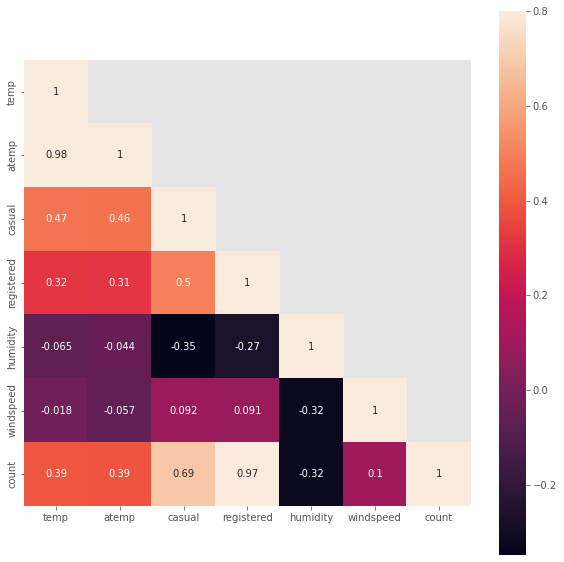

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

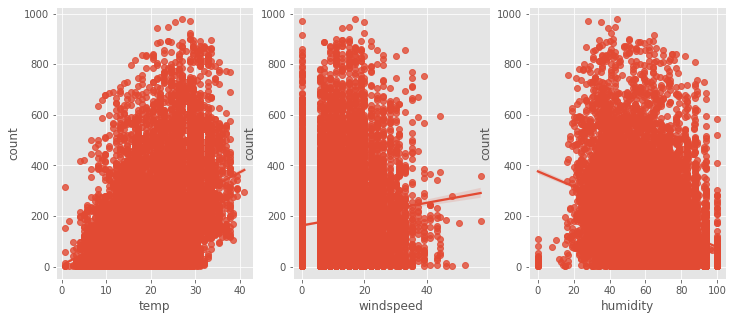

In [20]:
# 연속형 변수들과의 관계
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=train,ax=ax1)
sns.regplot(x="windspeed", y="count", data=train,ax=ax2)
sns.regplot(x="humidity", y="count", data=train,ax=ax3)

In [21]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


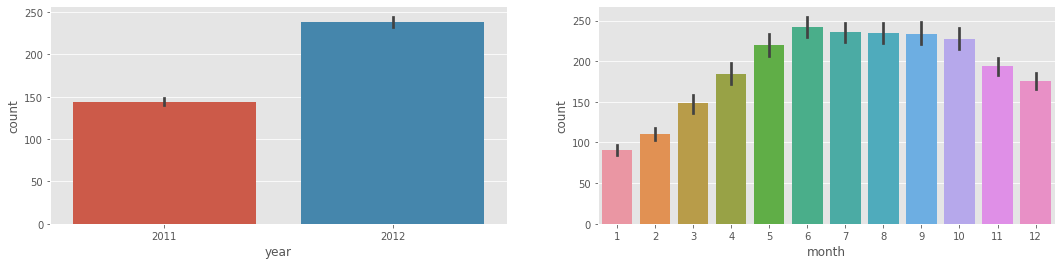

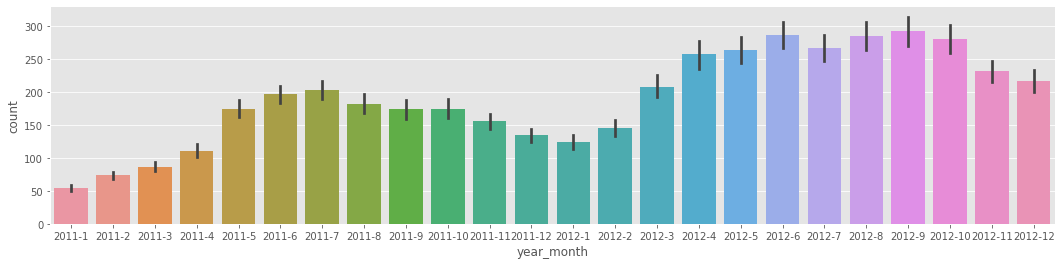

In [22]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="year", y="count", ax=ax1)
sns.barplot(data=train, x="month", y="count", ax=ax2)

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18, 4)

sns.barplot(data=train, x="year_month", y="count", ax=ax3)

In [ ]:
# trainWithoutOutliers
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3*train["count"].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)
